<a href="https://colab.research.google.com/github/SurekhaBerlin/WorldHappinessReport/blob/main/world_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## STEP 2 : Data Aquisition

In [2]:
happiness_2015 = pd.read_csv('2015.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2017 = pd.read_csv('2017.csv')
happiness_2018 = pd.read_csv('2018.csv')
happiness_2019 = pd.read_csv('2019.csv')

In [3]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
happiness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
happiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [7]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
happiness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [10]:
happiness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

## STEP 3: Data Preparation

In [11]:
# Create a dictionary for column renaming
column_mapping = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Whisker.high': 'Upper Confidence Interval',
    'Whisker.low': 'Lower Confidence Interval',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Overall rank': 'Happiness Rank'
}


In [12]:
# Apply the renaming to each dataframe
happiness_2015.rename(columns=column_mapping, inplace=True)
happiness_2016.rename(columns=column_mapping, inplace=True)
happiness_2017.rename(columns=column_mapping, inplace=True)
happiness_2018.rename(columns=column_mapping, inplace=True)
happiness_2019.rename(columns=column_mapping, inplace=True)

In [13]:
df = pd.concat([happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019], ignore_index=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


In [14]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval'],
      dtype='object')

In [15]:
columns_to_drop = ['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual','Standard Error','Region']
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [17]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Happiness Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
Economy (GDP per Capita),782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Health (Life Expectancy),782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075


## STEP 4 : Data Cleaning

In [19]:
df.shape

(782, 9)

In [20]:
df.isnull().sum()

,0
Country,0
Happiness Rank,0
Happiness Score,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),1
Generosity,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB


## STEP 5 : Data Analysis

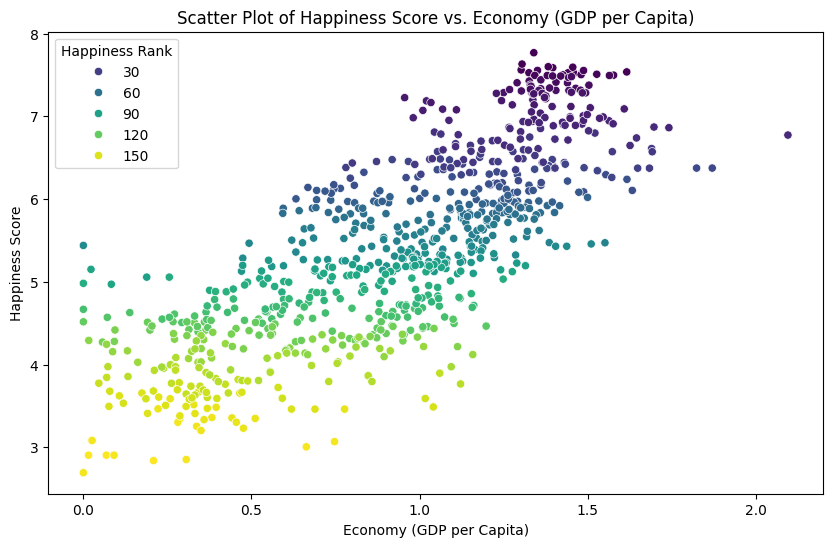

In [21]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df, hue='Happiness Rank', palette='viridis')

# Add titles and labels
plt.title('Scatter Plot of Happiness Score vs. Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

# Show the plot
plt.show()

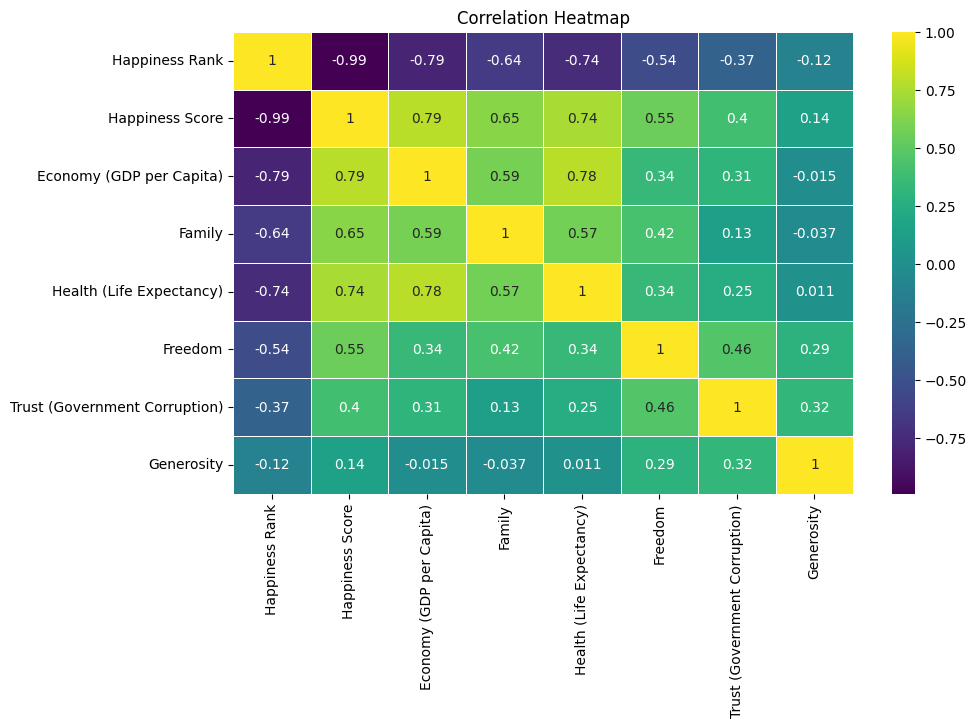

In [22]:
#Heatmap

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

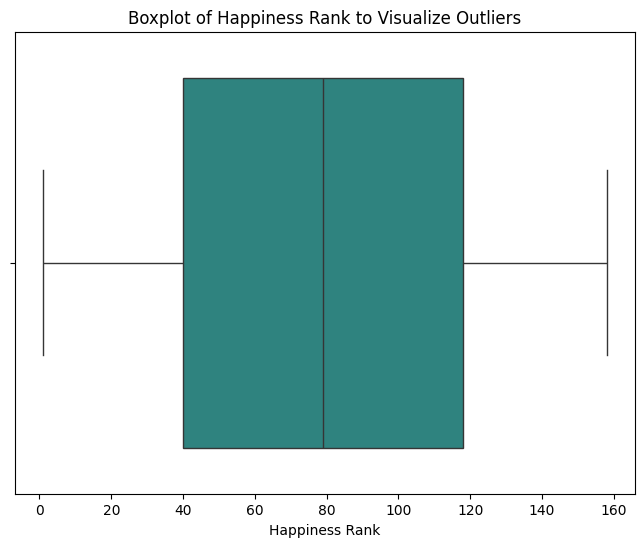

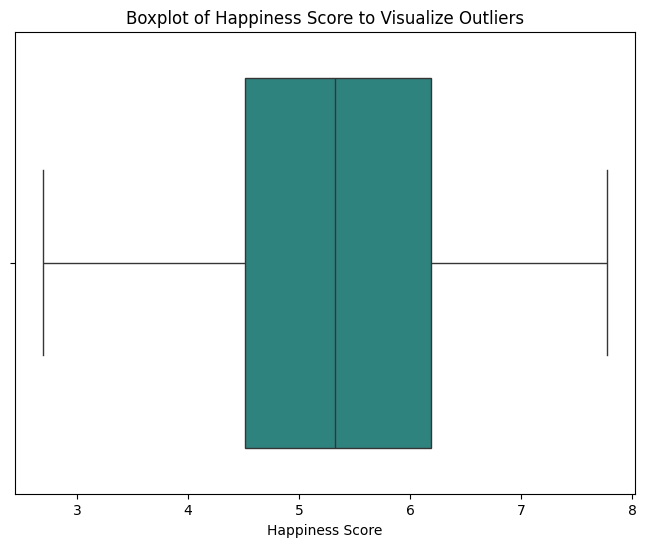

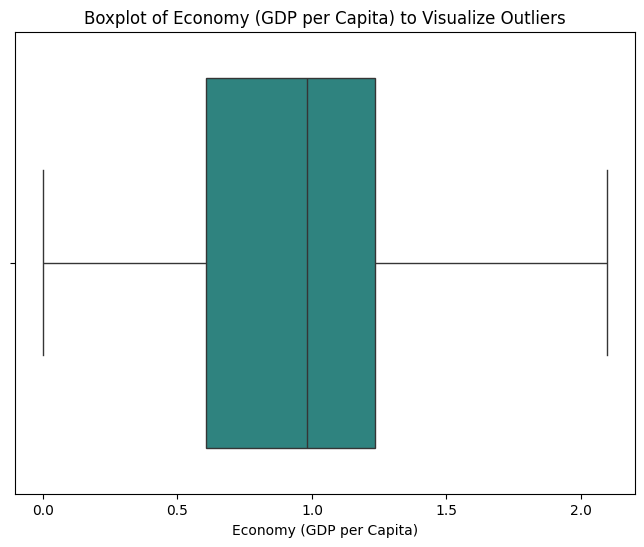

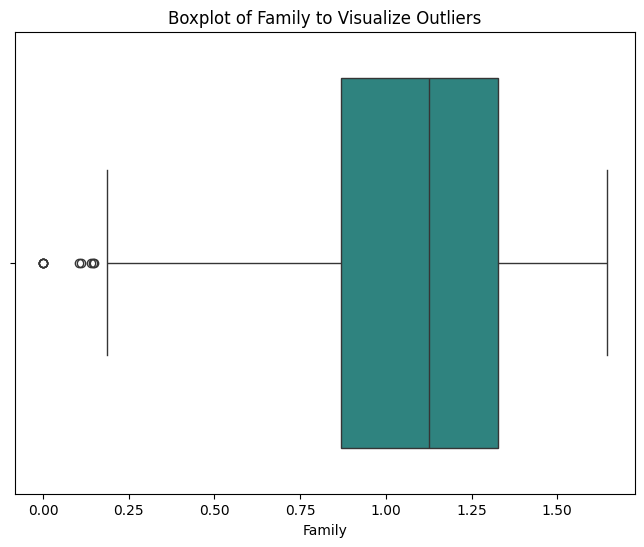

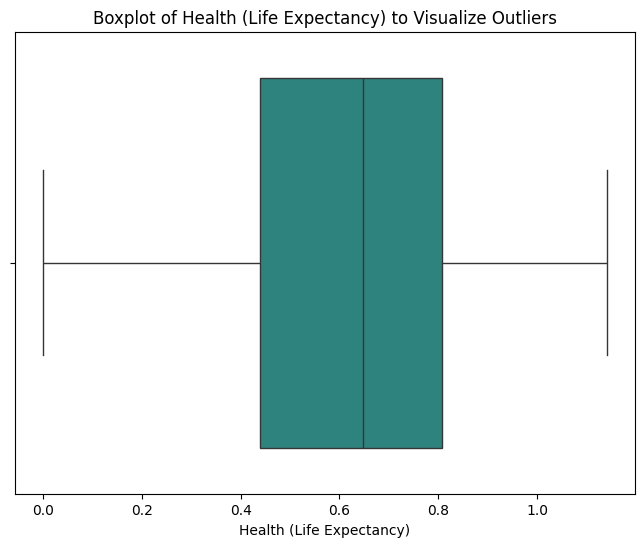

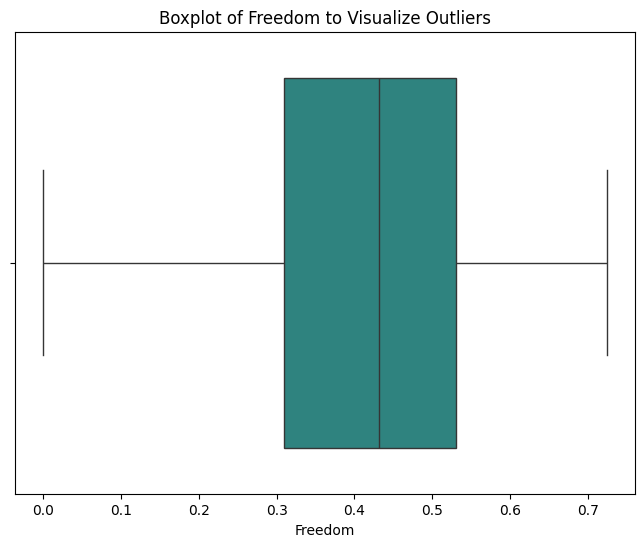

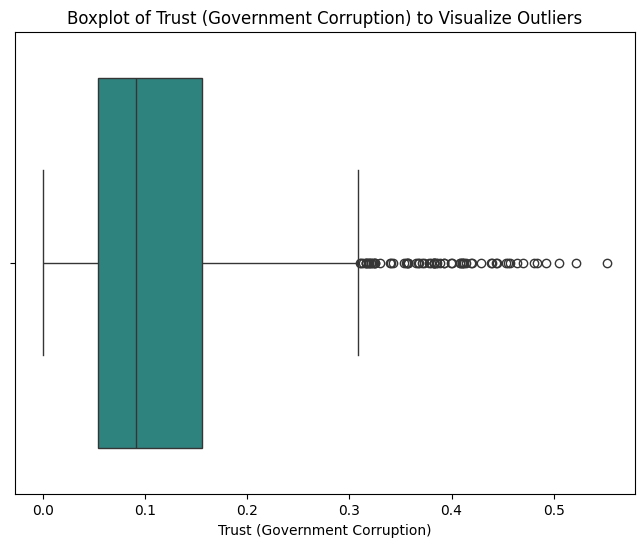

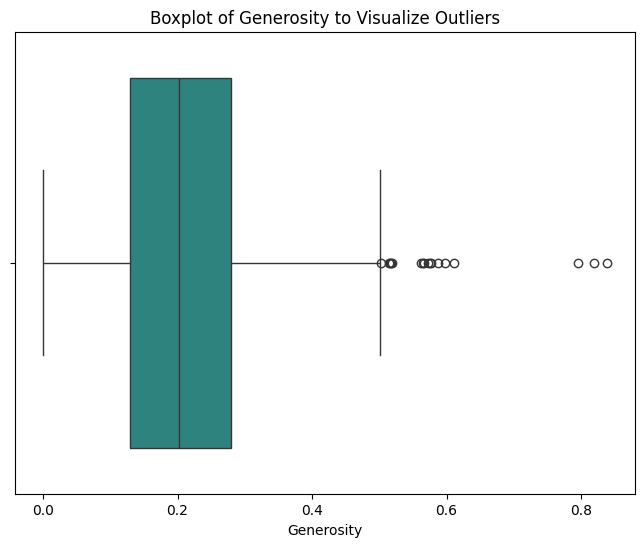

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create individual boxplots for each numeric column
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size for each plot
    sns.boxplot(x=numeric_df[column], palette='viridis')  # Boxplot for the column with viridis color
    plt.title(f'Boxplot of {column} to Visualize Outliers')
    plt.show()  # Show the plot for each column


In [36]:
from scipy.stats import zscore

# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the Z-scores for each numeric column
z_scores = zscore(numeric_df)

# Define a threshold for outliers (e.g., abs(z) > 3)
threshold = 3

# Remove rows where any column has a z-score greater than the threshold
df_no_outliers_zscore = df[(abs(z_scores) < threshold).all(axis=1)]

# Show the DataFrame with outliers removed
print(df_no_outliers_zscore)


Empty DataFrame
Columns: [Country, Happiness Rank, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []


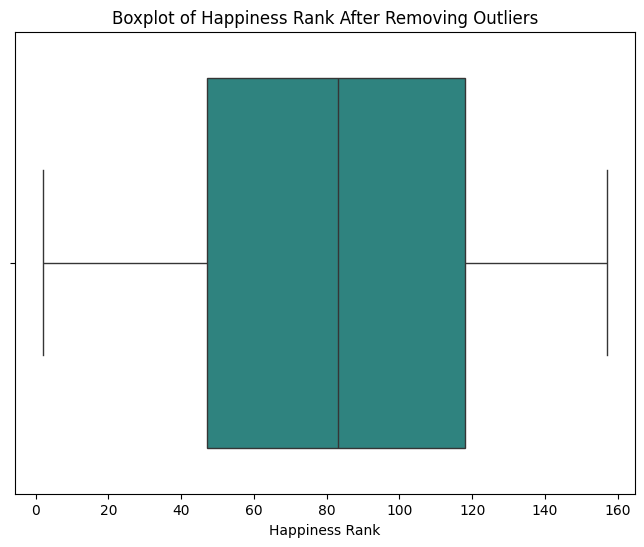

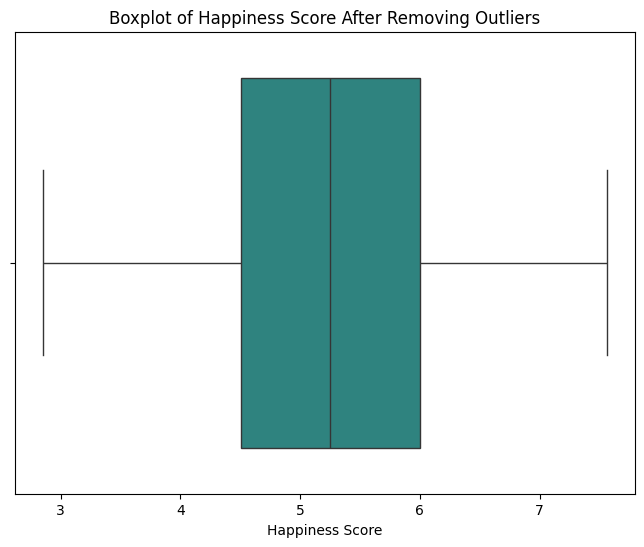

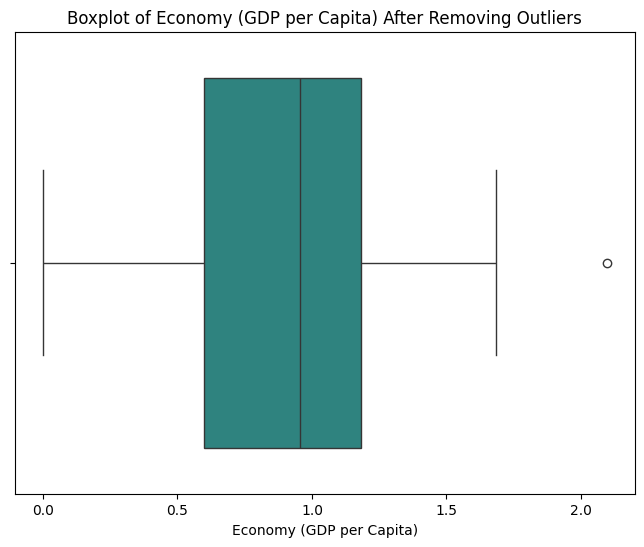

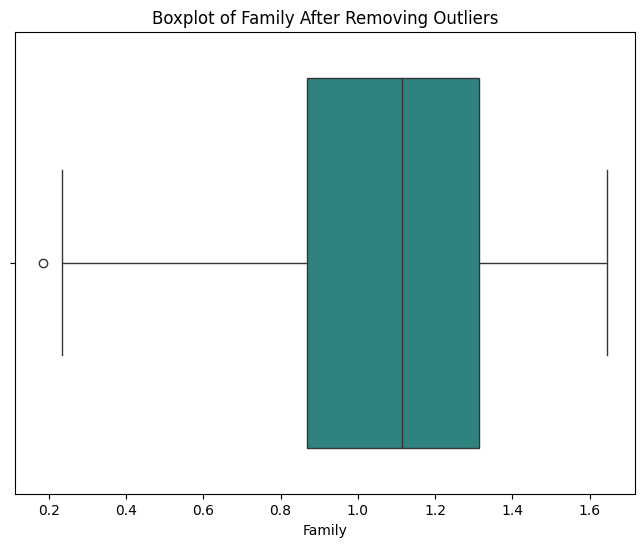

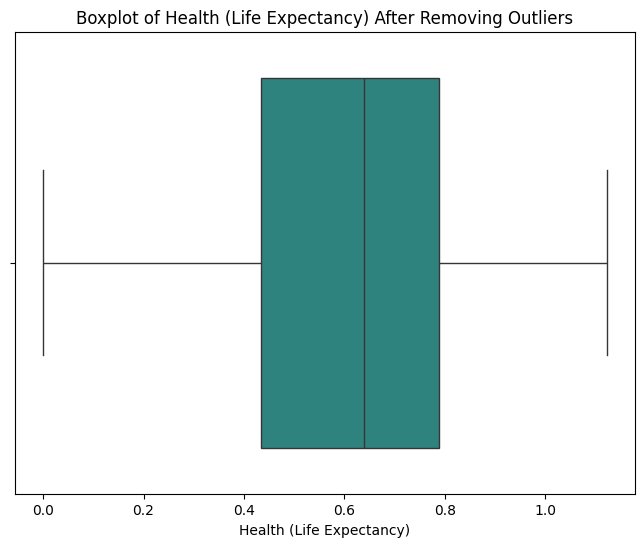

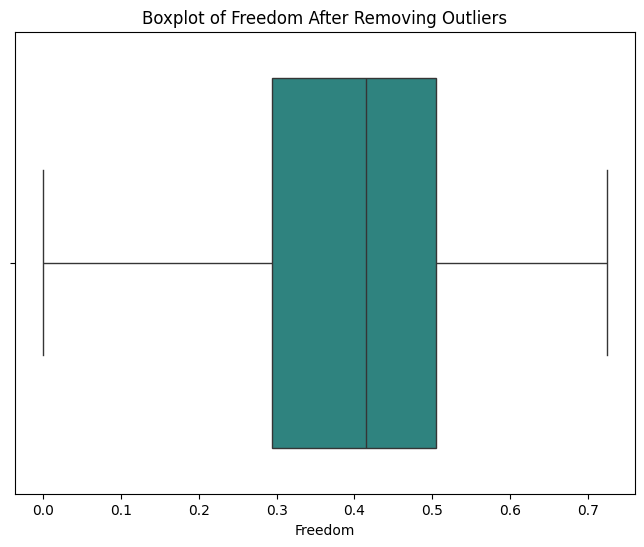

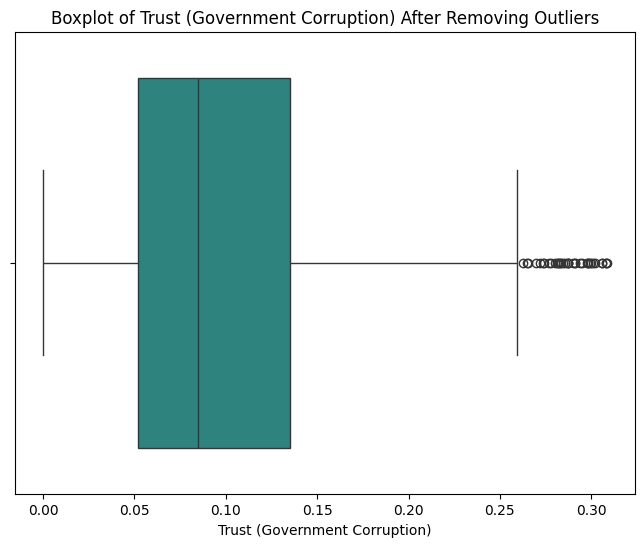

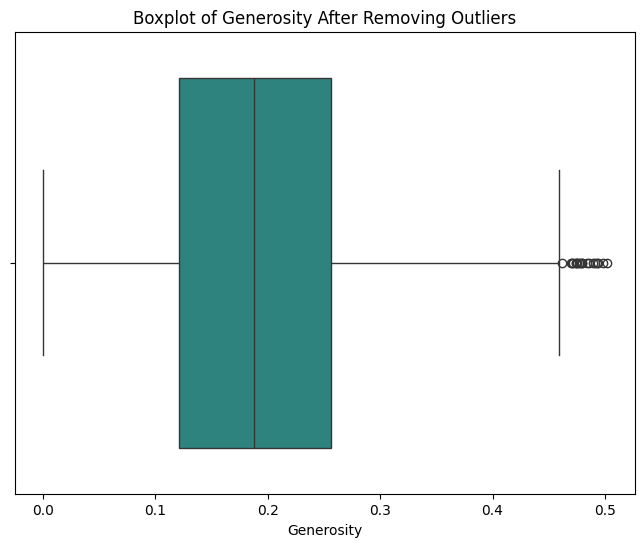

In [37]:
# Assuming 'df_no_outliers' is the DataFrame with outliers removed
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Create individual boxplots for each numeric column with 'viridis' palette
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size for each plot
    sns.boxplot(x=numeric_df[column], palette='viridis')  # Boxplot for the column with viridis color
    plt.title(f'Boxplot of {column} After Removing Outliers')
    plt.show()  # Show the plot for each column
